# 데이터셋 가져오기

In [1]:
import pandas as pd

df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

# 결측치 처리

In [5]:
ph_mean_0 = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isnull()), 'ph'] = ph_mean_0

ph_mean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isnull()), 'ph'] = ph_mean_1

sulf_mean_0 = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isnull()), 'Sulfate'] = sulf_mean_0

sulf_mean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isnull()), 'Sulfate'] = sulf_mean_1

trih_mean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isnull()), 'Trihalomethanes'] = trih_mean_0

trih_mean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isnull()), 'Trihalomethanes'] = trih_mean_1

In [6]:
df['ph'].isnull().sum()

0

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,
roc_auc_score, average_precision_score, precision_recall_curve, roc_curve,
ConfusionMatrixDisplay,  PrecisionRecallDisplay, RocCurveDisplay)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# 데이터 분리

In [8]:
X = df.drop(columns='Potability')
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify=y_train, random_state=0)

In [9]:
X_train.shape, X_test.shape

((2293, 9), (983, 9))

# Feature Scaling

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# 최적 파라미터

## RandomizedSearchCV

In [31]:
params = {
    "n_estimators":range(100,1001,100), 
    'max_depth':range(1,11),
    'max_features':range(5, 10)
}

rfc = RandomForestClassifier(random_state=0, class_weight='balanced')
rs = RandomizedSearchCV(rfc, 
                        params, 
                        scoring='accuracy',
                        cv=5, 
                        n_jobs=-1,
                        n_iter=60)

In [32]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 11),
                                        'max_features': range(5, 10),
                                        'n_estimators': range(100, 1001, 100)},
                   scoring='accuracy')

In [33]:
rs.best_score_

0.7819390929588721

In [34]:
rs.best_params_

{'n_estimators': 800, 'max_features': 5, 'max_depth': 10}

In [35]:
df_result = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score')
df_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
38,4.065191,0.077950,0.115212,0.013194,800,5,10,"{'n_estimators': 800, 'max_features': 5, 'max_...",0.784314,0.777778,0.797386,0.768559,0.781659,0.781939,0.009388,1
55,4.475528,0.110573,0.121185,0.000747,900,5,10,"{'n_estimators': 900, 'max_features': 5, 'max_...",0.779956,0.777778,0.806100,0.764192,0.781659,0.781937,0.013565,2
6,5.458357,0.135284,0.132386,0.004215,1000,6,10,"{'n_estimators': 1000, 'max_features': 6, 'max...",0.771242,0.782135,0.799564,0.766376,0.781659,0.780195,0.011421,3
1,2.764798,0.119706,0.065223,0.002495,500,6,9,"{'n_estimators': 500, 'max_features': 6, 'max_...",0.769063,0.769063,0.801743,0.757642,0.781659,0.775834,0.015019,4
29,3.083998,0.100554,0.065998,0.000892,500,7,10,"{'n_estimators': 500, 'max_features': 7, 'max_...",0.762527,0.779956,0.790850,0.762009,0.779476,0.774964,0.011137,5


In [36]:
best_model = rs.best_estimator_
best_model

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=5,
                       n_estimators=800, random_state=0)

In [37]:
accuracy_score(y_test, best_model.predict(X_test))

0.7965412004069176

In [38]:
def print_classification_metrics(y, pred, title=None):
    """
    인수로 받은 정답(y), 모델 예측값(pred)를 이용해 분류의 평가지표들을 출력
    출력할 평가지표 : accuracy, recall, precision, f1 score
    [parameter]
        y : ndarray - 정답(Ground Truth)
        pred : ndarray - 모델이 예측한 값
        title : str - 출력 결과들에 대한 제목
    [Return]
    [Exception]
    """
    print('='*50)
    if title:
        print(title)
        print('-'*50)
        print('정확도(Accuracy):', accuracy_score(y, pred))
        print('재현율/민감도(Recall):', recall_score(y, pred))
        print('정밀도(Precision):', precision_score(y, pred))
        print('F1 점수(F1 score):', f1_score(y, pred))
        print('='*50)
        
print_classification_metrics(y_test, best_model.predict(X_test), title='Best Model Test')

Best Model Test
--------------------------------------------------
정확도(Accuracy): 0.7965412004069176
재현율/민감도(Recall): 0.6710182767624021
정밀도(Precision): 0.7764350453172205
F1 점수(F1 score): 0.7198879551820729


In [39]:
fi_rs = best_model.feature_importances_
fi_rs

array([0.21493397, 0.07343884, 0.07430702, 0.07772192, 0.37523612,
       0.04380823, 0.04706466, 0.05039413, 0.0430951 ])

In [40]:
fi_rs_s = pd.Series(fi_rs, index = X.columns)
fi_rs_s

ph                 0.214934
Hardness           0.073439
Solids             0.074307
Chloramines        0.077722
Sulfate            0.375236
Conductivity       0.043808
Organic_carbon     0.047065
Trihalomethanes    0.050394
Turbidity          0.043095
dtype: float64

<AxesSubplot:>

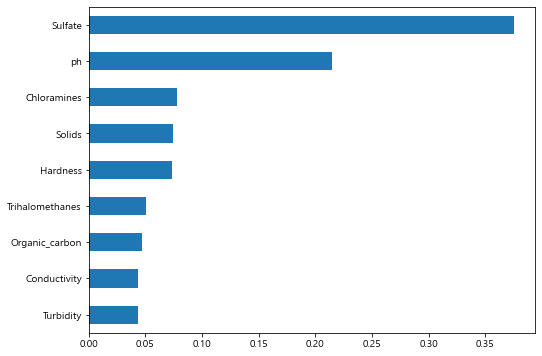

In [41]:
fi_rs_s.sort_values().plot(kind='barh', figsize=(8,6))

In [42]:
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)

pred_train_proba = best_model.predict_proba(X_train)[:, 1]
pred_test_proba = best_model.predict_proba(X_test)[:, 1]

In [43]:
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

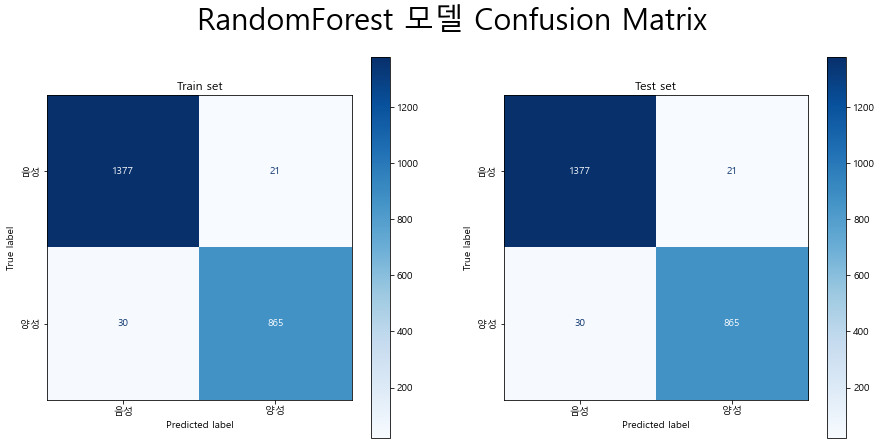

In [44]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(15,7))
plt.suptitle('RandomForest 모델 Confusion Matrix', fontsize=30)

disp1 = ConfusionMatrixDisplay(cm_train, display_labels=['음성', '양성'])
disp1.plot(cmap='Blues', ax=axes[0])
axes[0].set_title('Train set') 

disp2 = ConfusionMatrixDisplay(cm_test, display_labels=['음성', '양성'])
disp1.plot(cmap='Blues', ax=axes[1])
axes[1].set_title('Test set')
plt.show()

In [45]:
ap_train = average_precision_score(y_train, pred_train_proba)
ap_test = average_precision_score(y_test, pred_test_proba)
print(ap_train, ap_test)

0.9968849742869812 0.850145055698502


In [46]:
precision_train, recall_train, _ = precision_recall_curve(y_train, pred_train_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, pred_test_proba)

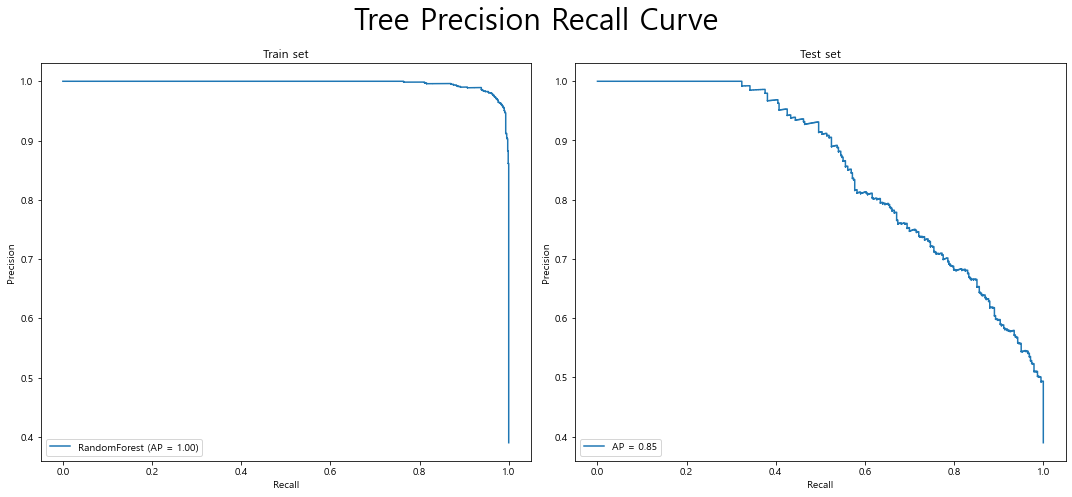

In [47]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
fig.suptitle('Tree Precision Recall Curve', fontsize=30)

disp_pr1 = PrecisionRecallDisplay(precision_train, recall_train, average_precision=ap_train, estimator_name='RandomForest')
disp_pr1.plot(ax=axes[0])
axes[0].set_title('Train set')

disp_pr2 = PrecisionRecallDisplay(precision_test, recall_test, average_precision=ap_test)
disp_pr2.plot(ax=axes[1])
axes[1].set_title('Test set')

plt.tight_layout()
plt.show()

In [48]:
auc_train = roc_auc_score(y_train, pred_train_proba)
auc_test = roc_auc_score(y_test, pred_test_proba)

print(auc_train, auc_test)

0.9980139225229978 0.8826936466492602


In [49]:
fpr_train, tpr_train, _ = roc_curve(y_train, pred_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, pred_test_proba)

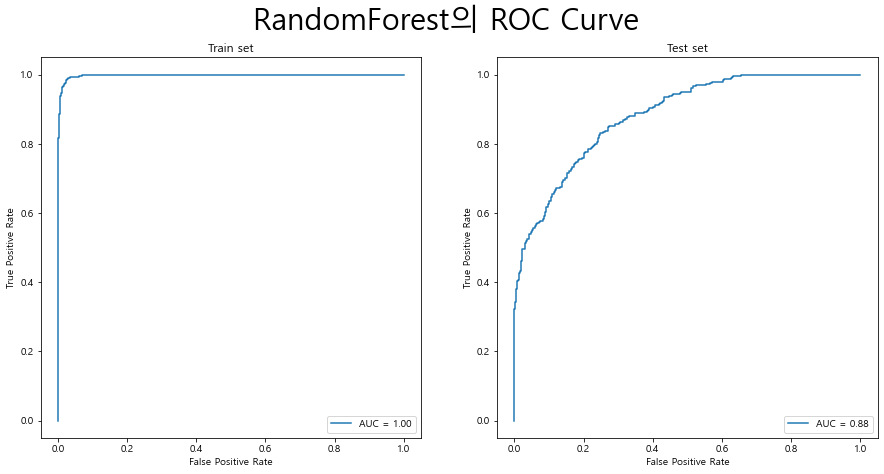

In [50]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(15,7))
fig.suptitle('RandomForest의 ROC Curve', fontsize=30)

disp_roc1 = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=auc_train)
disp_roc1.plot(ax=axes[0])
axes[0].set_title('Train set')

disp_roc2 = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_test)
disp_roc2.plot(ax=axes[1])
axes[1].set_title('Test set')

plt.show()